# BitCoin Price Predition 

Before executing this File Please install the given requirments using the commands given below:-

1. Pandas module :- pip install pandas
2. numpy module:- pip install numpy
3. seaborn module:- pip install seaborn

### Importing Required modules

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

### Read Bitcoin_Dataset

In [50]:
data = pd.read_csv("bitcoin_dataset.csv") 
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [51]:
display(data.iloc[1023]) 

Date                                                     12/6/2012
btc_market_price                                           13.6888
btc_total_bitcoins                                     1.05288e+07
btc_market_cap                                         1.44126e+08
btc_trade_volume                                            718984
btc_blocks_size                                               3829
btc_avg_block_size                                        0.127314
btc_n_orphaned_blocks                                            0
btc_n_transactions_per_block                                   250
btc_median_confirmation_time                                  11.6
btc_hash_rate                                              24.4457
btc_difficulty                                         3.43891e+06
btc_miners_revenue                                         49361.8
btc_transaction_fees                                       31.0582
btc_cost_per_transaction_percent                           1.6

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

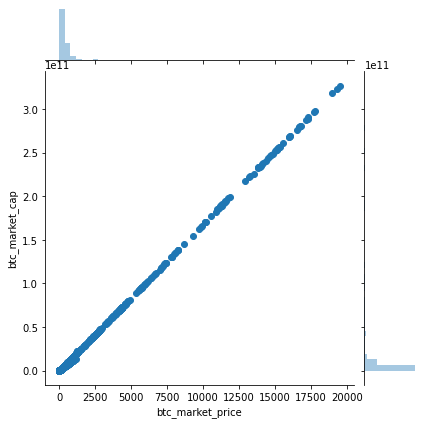

In [53]:
p = sns.jointplot(data=data,x='btc_market_price', y='btc_market_cap')

In [54]:
Bitcoin=data[['btc_market_cap', 'btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty',
            'btc_hash_rate','btc_cost_per_transaction_percent','btc_market_price']]
Bitcoin

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent,btc_market_price
0,0.000000e+00,244,0.00,0.000000,2.527738e+00,2.920000e-05,31.781022,0.00000
1,0.000000e+00,235,0.00,0.000000,2.527738e+00,2.880000e-05,154.463801,0.00000
2,0.000000e+00,183,0.00,0.000000,2.527738e+00,2.250000e-05,1278.516635,0.00000
3,0.000000e+00,224,0.00,0.000000,2.527738e+00,2.790000e-05,22186.687990,0.00000
4,0.000000e+00,218,0.00,0.000000,2.527738e+00,2.690000e-05,689.179876,0.00000
...,...,...,...,...,...,...,...,...
2901,1.940000e+11,193578,23654604.11,126.855696,2.600000e+12,2.031575e+07,1.778601,11524.77667
2902,1.980000e+11,213446,24143236.92,117.430262,2.600000e+12,2.044515e+07,1.302242,11765.71000
2903,1.890000e+11,232176,21651636.81,96.382352,2.600000e+12,1.915115e+07,1.243012,11212.65500
2904,1.710000e+11,236609,22124873.97,96.749249,2.600000e+12,2.160975e+07,1.301143,10184.06167


In [55]:
Bitcoin.isnull().sum()

btc_market_cap                       0
btc_n_transactions                   0
btc_miners_revenue                   0
btc_cost_per_transaction             0
btc_difficulty                      16
btc_hash_rate                        0
btc_cost_per_transaction_percent     0
btc_market_price                     0
dtype: int64

In [56]:
mean=Bitcoin.btc_difficulty.mean()
Bitcoin.btc_difficulty.fillna(mean, inplace=True)

D:\Ckprogramfiles\anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [57]:
Bitcoin.isnull().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
btc_market_price                    0
dtype: int64

In [58]:
X=Bitcoin.drop(['btc_market_price'],axis='columns',inplace=False)
y=Bitcoin['btc_market_price']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(2324, 7) (582, 7) (2324,) (582,)


In [63]:
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)
print("Training completed")

Training completed


In [65]:
y_predict=l_reg.predict(X_test)
predictions = l_reg.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

20.953653402534407


### The Root Mean Square Error is 20.953653402534407